# Project: Wrangling and Analyze Data

## Data Gathering
In this section, all 3 pieces of data for this project will be loaded. 

In [248]:
import requests
import pandas as pd
import numpy as np
import json
from io import StringIO
from bs4 import BeautifulSoup

1. Load the WeRateDogs Twitter archive data `twitter_archive_enhanced.csv` into a pandas dataframe

In [249]:
xarchive = pd.read_csv("twitter_archive_enhanced.csv")

In [250]:
xarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

2. Download `image_predections.tsv` with requests and load it into a pandas dataframe

In [251]:
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open("image_predictions.tsv", "wb") as file:
    file.write(response.content)

In [252]:
image_predictions = pd.read_csv("image_predictions.tsv", sep="\t")

3. Read the `tweet_json.txt` file line-by-line and transform it into valid JSON which pandas can understand.

- Put all JSON elements in a list
- Seperate them properly with a comma

`tweet_json.txt` was used due to the Twitter API changes

In [253]:
with open("tweet_json.txt") as json_file:
    tweet_json = "[" + pd.Series(json_file.readlines()).str.cat(sep=",") + "]"

In [254]:
tweet_df = pd.read_json(StringIO(tweet_json))

In [255]:
xarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [256]:
xarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [257]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [258]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [259]:
tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [260]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## Assessing Data

As per the requirements in this project, I will detect and document at least 8 quality issues and 2 tidiness issues.

As required, I will only include original ratings that have images. That means removing retweets and tweets that aren't dog ratings.

### Quality Issues

#### `tweet_df`
1. Data has extra columns (we only need id, retweet and like count)

#### `xarchive`:
2. Not all tweets are original ratings, some are replies, some are retweets
3. Not all dog ratings have images
4. Dogs sometimes have incorrect names "a", "an", or "the"
5. `source` has HTML in it
6. `expanded_urls` has multiple urls seperated by a comma
7. `expanded_urls` has duplicate urls in the same row
8. Ratings are sometimes incorrect (very few cases of this)
9. Snoop Dogg.
10. `timestamp` is a string

#### All data:
11. tweet ids are ints

#### `image_predictions`:
12. some values of `p1`, `p2`, `p3` are all lower case, some only have some upper case letters
13. Not all ratings are dogs (Addressed after tidiness)
14. `img_num` > 1 doesn't mean all images were analyzed

### Tidiness Issues

15. `doggo`, `floofer`, `pupper`, `puppo` should all be in one column with a list data type
16. `tweet_df` and `image_predictions` should be merged into `xarchive`

## Cleaning Data

Before anything, I'll make a clone of the data to work on.

In [261]:
xarchive_clean = xarchive.copy()
image_predictions_clean = image_predictions.copy()
tweet_df_clean = tweet_df.copy()

#### Quality Issue No. 1

*Data has extra columns (we only need id, retweet and like count)*

Define: Include only `id`, `retweet_count`, `favorite_count` columns

In [262]:
tweet_df_clean = tweet_df_clean[["id", "retweet_count", "favorite_count"]]

Test:

In [263]:
list(tweet_df_clean)

['id', 'retweet_count', 'favorite_count']

#### Quality Issue No. 2

*Not all tweets are original ratings, some are replies, some are retweets*

Define: Remove all rows with a non-null `retweeted_status_id` value, and all rows with a non-null `in_reply_to_status_id` value and remove the retweet and reply columns

Removing retweets:

In [264]:
xarchive_clean = xarchive_clean[xarchive_clean["retweeted_status_id"].isnull()]

Testing if any retweets exist:

In [265]:
xarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        1495 non-null   object 
 13  doggo                       87 non-nul

We can see that all rows with retweets were removed, we can continue and remove the retweet columns.

In [266]:
xarchive_clean.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)

Removing replies:

In [267]:
xarchive_clean = xarchive_clean[xarchive_clean["in_reply_to_status_id"].isnull()]

Testing if any replies exist:

In [268]:
xarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              2097 non-null   object 
 4   source                 2097 non-null   object 
 5   text                   2097 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   rating_numerator       2097 non-null   int64  
 8   rating_denominator     2097 non-null   int64  
 9   name                   1494 non-null   object 
 10  doggo                  83 non-null     object 
 11  floofer                10 non-null     object 
 12  pupper                 230 non-null    object 
 13  puppo                  24 non-null     object 
dtypes: float64(2), int64(3), object(9)
memory usage: 245.7+ KB


We can see that all rows with replies were removed, we can continue and remove the reply columns.

In [269]:
xarchive_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id"], axis=1, inplace=True)

#### Quality Issue No. 3

*Not all dog ratings have images*

Define: Remove all rows without `https://t.co/` in their `text` column (https://t.co/ is the shorthand for Twitter image links)

Remove posts without images:

In [270]:
xarchive_clean = xarchive_clean[xarchive_clean["text"].str.contains("https://t.co/")]

Test:

In [271]:
if xarchive_clean["text"].str.contains("https://t.co/").value_counts().values.sum() == xarchive_clean.shape[0]:
    print("SUCCESS")
else:
    print("ERROR")

SUCCESS


#### Quality Issue No. 4

*Dogs sometimes have incorrect names "a", "an", or "the"*

Define: Replace all unknown names with a null value

In [272]:
# https://stackoverflow.com/a/49406417
xarchive_clean["name"] = xarchive_clean["name"].replace({"a": np.nan, "an": np.nan, "the": np.nan, "quite": np.nan, "just": np.nan})

Test:

In [273]:
xarchive_clean["name"].value_counts()

name
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
              ..
Bonaparte      1
Wishes         1
Rose           1
Theo           1
Christoper     1
Name: count, Length: 949, dtype: int64

#### Quality Issue No. 5

*`source` has HTML in it*

Define: Remove the HTML tags and include just the text with BeautifulSoup

In [274]:
def get_text(item):
    '''
    Returns the text content of the HTML tag

    Prameters:
        item (string): HTML tag
    
    Returns:
        (string): Content text
    '''
    return BeautifulSoup(item, "lxml").text

In [275]:
xarchive_clean["source"] = xarchive_clean["source"].map(get_text)

Test:

In [276]:
xarchive_clean["source"].sample(5)

2349    Twitter for iPhone
2322    Twitter for iPhone
1734    Twitter for iPhone
2068    Twitter for iPhone
134     Twitter for iPhone
Name: source, dtype: object

#### Quality Issue No. 6

*`expanded_urls` has multiple urls seperated by a comma*

Define: Convert `expanded_urls` into a list

In [277]:
xarchive_clean["expanded_urls"] = xarchive_clean["expanded_urls"].str.split(",")

Test:

In [278]:
xarchive_clean["expanded_urls"].sample(5)

2275    [https://twitter.com/dog_rates/status/66745302...
1068    [https://twitter.com/dog_rates/status/74037318...
217     [https://twitter.com/dog_rates/status/85038019...
921     [https://twitter.com/dog_rates/status/75628853...
71      [https://twitter.com/dog_rates/status/87877609...
Name: expanded_urls, dtype: object

#### Quality Issue No. 7

*`expanded_urls` has duplicate urls in the same row*

Define: Remove duplicates from each list

In [279]:
xarchive_clean["expanded_urls"] = xarchive_clean["expanded_urls"].map(np.unique)

Test:

In [280]:
xarchive_clean["expanded_urls"].sample(5)

402     [https://twitter.com/dog_rates/status/82432561...
866     [https://twitter.com/dog_rates/status/76203568...
1298    [https://twitter.com/dog_rates/status/70774151...
360     [https://twitter.com/dog_rates/status/82986139...
2147    [https://twitter.com/dog_rates/status/66975317...
Name: expanded_urls, dtype: object

#### Quality Issue No. 8

*Ratings are sometimes incorrect (very few cases of this in visual assessment)*

Define: Extract all ratings from `text` with regex

In [281]:
xarchive_clean["rating_numerator"] = xarchive_clean["text"].str.extract(r"(\d+/\d+)").squeeze().str.split("/", expand=True)[0].astype(int)
xarchive_clean["rating_denominator"] = xarchive_clean["text"].str.extract(r"(\d+/\d+)").squeeze().str.split("/", expand=True)[1].astype(int)

Test:

In [282]:
xarchive_clean[["rating_numerator", "rating_denominator"]]

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


#### Quality Issue No. 9

*Snoop Dogg (not a real dog btw)*

Define: Remove tweet with id [670842764863651840](https://twitter.com/dog_rates/status/670842764863651840/)

In [283]:
xarchive_clean[xarchive_clean["tweet_id"] == 670842764863651840]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2074,670842764863651840,2015-11-29 05:52:33 +0000,Twitter for iPhone,After so many requests... here you go.\n\nGood...,[https://twitter.com/dog_rates/status/67084276...,420,10,NaN,NaN,NaN,NaN,NaN


In [284]:
xarchive_clean = xarchive_clean[xarchive_clean["tweet_id"] != 670842764863651840]

Test:

In [285]:
xarchive_clean[xarchive_clean["tweet_id"] == 670842764863651840]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Quality Issue No. 10

*`timestamp` is a string*

Define: Convert `timestamp` to a datetime object

In [286]:
xarchive_clean["timestamp"] = pd.to_datetime(xarchive_clean["timestamp"])

Test:

In [287]:
xarchive_clean["timestamp"].dtype

datetime64[ns, UTC]

#### Quality Issue No. 11

*tweet ids are ints*

This is like a ZIP Code being an int

Define: Convert all tweet ids to a str

In [288]:
xarchive_clean["tweet_id"] = xarchive_clean["tweet_id"].astype(str)
image_predictions_clean["tweet_id"] = image_predictions_clean["tweet_id"].astype(str)
tweet_df_clean["id"] = tweet_df_clean["id"].astype(str)

Test:

In [289]:
print(xarchive_clean["tweet_id"].dtype, image_predictions_clean["tweet_id"].dtype, tweet_df_clean["id"].dtype)

object object object


#### Quality Issue No. 12

*some values of `p1`, `p2`, `p3` are all lower case, some only have some upper case letters*

Define: Make all values lowercase

In [290]:
image_predictions_clean["p1"] = image_predictions_clean["p1"].str.lower()
image_predictions_clean["p2"] = image_predictions_clean["p2"].str.lower()
image_predictions_clean["p3"] = image_predictions_clean["p3"].str.lower()

Test:

In [291]:
image_predictions_clean[["p1", "p2", "p3"]].head()

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


#### Quality Issue No. 14

*`img_num` > 1 doesn't mean all images were analyzed*

There's only one image prediction for each tweet, that means only one image was analyzed, and also there is only one `jpg_url`.

Define: Remove `img_num`

In [292]:
image_predictions_clean.drop("img_num", axis=1, inplace=True)

Test:

In [293]:
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### Tidiness Issue No. 15

*`doggo`, `floofer`, `pupper`, `puppo` should all be in one column with a list data type*

Define: Make `dogtionary` column and have the words in a list

In [294]:
def dogtionary_cleaner(row):
    '''
    Returns a list with the dogtionary words mentioned in the tweet

    Prameters:
        row (Series): xarchive row with "doggo", "floofer", "pupper", "puppo" columns
    
    Returns:
        (list): All dogtionary words mentioned in the tweet
    '''
    dogtionary_list = []
    for word in ["doggo", "floofer", "pupper", "puppo"]:
        if type(row[word]) != float:
            dogtionary_list.append(row[word])
    return dogtionary_list

In [295]:
xarchive_clean["dogtionary"] = xarchive_clean.apply(dogtionary_cleaner, axis=1)

In [296]:
xarchive_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

Test:

In [297]:
xarchive_clean["dogtionary"].value_counts()

dogtionary
[]                  1758
[pupper]             220
[doggo]               72
[puppo]               23
[floofer]              9
[doggo, pupper]        9
[doggo, puppo]         1
[doggo, floofer]       1
Name: count, dtype: int64

#### Tidiness Issue No. 16

*`tweet_df` and `image_predictions` should be merged into `xarchive`*

Define: Merge `tweet_df` and `image_predictions` into `xarchive` based on `tweet_id`

In [298]:
tweet_df_clean.rename({"id": "tweet_id"}, axis=1, inplace=True)
xarchive_clean = pd.merge(xarchive_clean, tweet_df_clean, on=["tweet_id"], how="left")
xarchive_clean = pd.merge(xarchive_clean, image_predictions_clean, on=["tweet_id"], how="left")

Test:

In [299]:
xarchive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,[https://twitter.com/dog_rates/status/89242064...,13,10,Phineas,[],8853,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,[https://twitter.com/dog_rates/status/89217742...,13,10,Tilly,[],6514,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,[https://twitter.com/dog_rates/status/89181518...,12,10,Archie,[],4328,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,[https://twitter.com/dog_rates/status/89168955...,13,10,Darla,[],8964,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,[https://twitter.com/dog_rates/status/89132755...,12,10,Franklin,[],9774,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [300]:
xarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   object             
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int32              
 6   rating_denominator  2093 non-null   int32              
 7   name                1419 non-null   object             
 8   dogtionary          2093 non-null   object             
 9   retweet_count       2093 non-null   int64              
 10  favorite_count      2093 non-null   int64              
 11  jpg_url             1970 non-null   object             
 12  p1                  1970 non-null 

I do not know if the missing values when `image_predictions` was merged is because some tweets do not have images for some reason or if the image predictions aren't complete, but if it were necessary to remove tweets not in `image_predictions`...

In [301]:
xarchive_clean = xarchive_clean[xarchive_clean["jpg_url"].notnull()]

#### Quality Issue No. 13

*Not all ratings are dogs (Addressed after tidiness)*

This is addressed after tidiness because it is easier to check if atleast one value is true when the values are in the same DataFrame.

Define: Only include rows with `p1_dog`, `p2_dog`, `p3_dog` where atleast one value is true

In [302]:
xarchive_clean = xarchive_clean[(xarchive_clean["p1_dog"] == True) | (xarchive_clean["p2_dog"] == True) | (xarchive_clean["p3_dog"] == True)]

Test: (checking if there are any rows where all 3 are false)

In [303]:
xarchive_clean[(xarchive_clean["p1_dog"] == False) & (xarchive_clean["p2_dog"] == False) & (xarchive_clean["p3_dog"] == False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Storing Data

In [304]:
xarchive_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data

### Labeled Visualization

<Axes: title={'center': 'Source of Tweets'}>

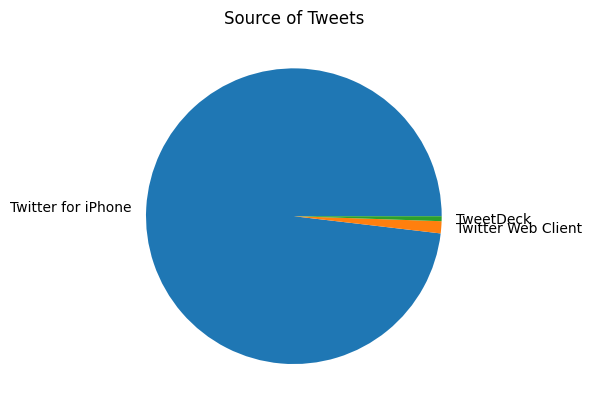

In [305]:
xarchive_clean["source"].value_counts().plot.pie(title="Source of Tweets", ylabel="")

Seems like a majority of tweets were posted from an iPhone.

### Insights

#### 1. Most popular time to post

In [306]:
xarchive_clean["timestamp"].dt.hour.value_counts().sort_index()

timestamp
0     222
1     236
2     170
3     134
4      75
5      18
6       3
13      1
14      4
15     76
16    166
17    142
18     81
19     68
20     62
21     57
22     55
23     96
Name: count, dtype: int64

Seems like the most popular time to post is from 3 PM to 4 AM and peaks at 12AM-4AM and 4PM-5PM

#### 2. Tweet with highest rating

In [307]:
xarchive_clean.loc[(xarchive_clean["rating_numerator"] / xarchive_clean["rating_denominator"]).idxmax()]

tweet_id                                             786709082849828864
timestamp                                     2016-10-13 23:23:56+00:00
source                                               Twitter for iPhone
text                  This is Logan, the Chow who lived. He solemnly...
expanded_urls         [https://twitter.com/dog_rates/status/78670908...
rating_numerator                                                     75
rating_denominator                                                   10
name                                                              Logan
dogtionary                                                           []
retweet_count                                                      7069
favorite_count                                                    20296
jpg_url                 https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg
p1                                                           pomeranian
p1_conf                                                        0

This is what WeRateDogs liked the most:
![cute dog](https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg)

#### 3. Tweet with highest likes

In [308]:
xarchive_clean.loc[xarchive_clean["favorite_count"].idxmax()]

tweet_id                                             822872901745569793
timestamp                                     2017-01-21 18:26:02+00:00
source                                               Twitter for iPhone
text                  Here's a super supportive puppo participating ...
expanded_urls         [https://twitter.com/dog_rates/status/82287290...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
dogtionary                                                      [puppo]
retweet_count                                                     48265
favorite_count                                                   132810
jpg_url                 https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
p1                                                     lakeland_terrier
p1_conf                                                        0

This is what Twitter users liked the most:
![cute puppo](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg)